### Задача №12.

Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием функции "логарифм - np.log(X)".


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import scipy.stats as stats

In [2]:
data = pd.read_csv('/Users/a.fedorova/Desktop/учеба/Великолепная мага/2 сем/датасеты/top2018.csv', sep=",")

In [3]:
data.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


Рассмотрим параметр valence - валентность. Мера от 0,0 до 1,0, описывающая музыкальную позитивность, передаваемую треком. Треки с высокой валентностью звучат более позитивно (например, счастливые, веселые, эйфорические), а треки с низкой валентностью - более негативные (например, грустные, подавленные, сердитые). валентность

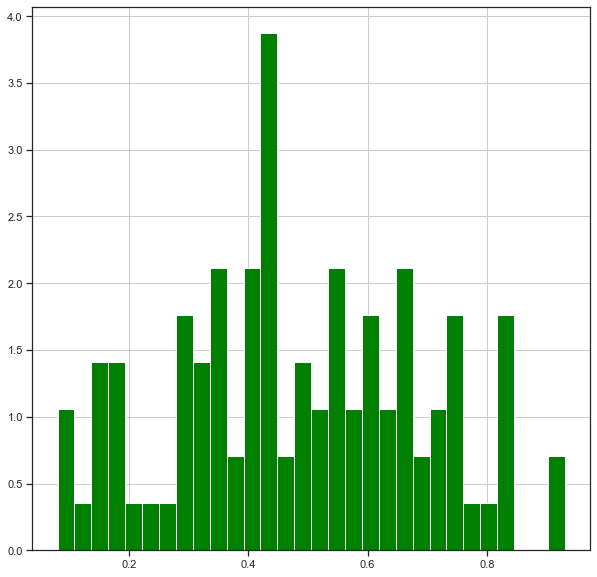

In [6]:
fig, ax = plt.subplots(figsize=(10,10)) 
data['valence'].hist(bins=30, ax=ax, density=True, color='green')

In [7]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

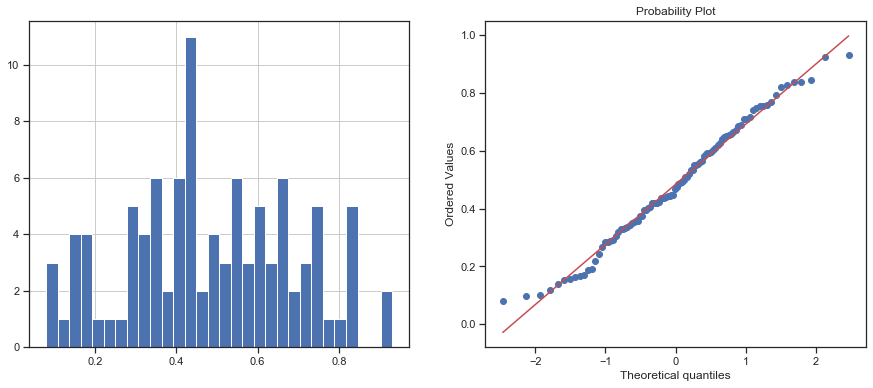

In [10]:
diagnostic_plots(data, 'valence')

## Логарифмическое преобразование

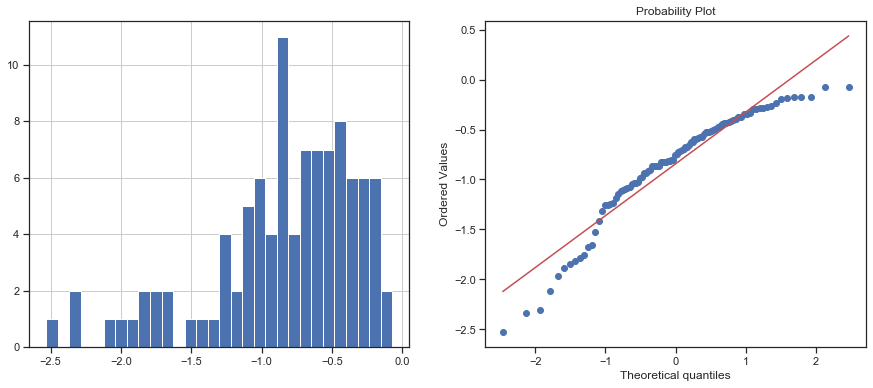

In [9]:
data['valenceLog'] = np.log(data['valence'])
diagnostic_plots(data, 'valenceLog')

Параметр danceability - танцевальность. Танцевальность описывает, насколько подходит трек для танцев, основанный на комбинации музыкальных элементов, включая темп, стабильность ритма, силу удара и общую регулярность. Значение 0,0 наименее танцевально, а 1,0 - наиболее танцевально.

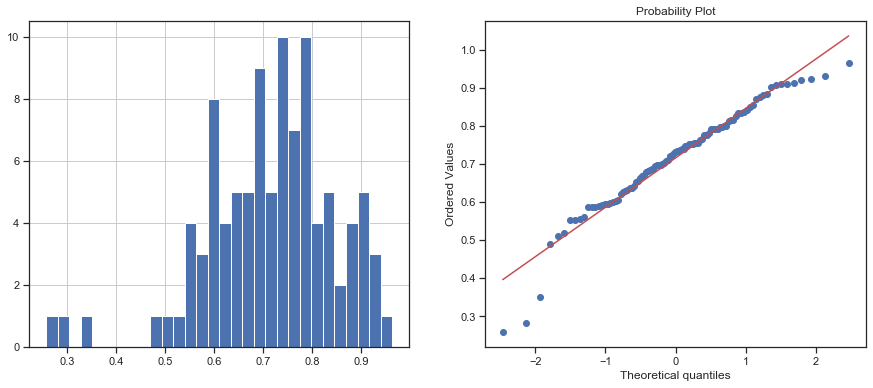

In [11]:
diagnostic_plots(data, 'danceability')

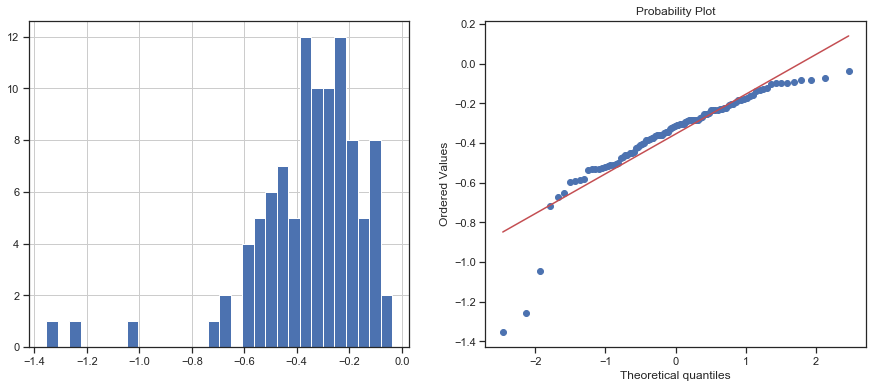

In [13]:
data['danceabilityLog'] = np.log(data['danceability'])
diagnostic_plots(data, 'danceabilityLog')

### Задача №32.

Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод обертывания (wrapper method), обратный алгоритм (sequential backward selection).

In [18]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 115 kB/s eta 0:00:01


In [59]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [66]:
# датасет - https://www.kaggle.com/uciml/mushroom-classification
data2 = pd.read_csv('/Users/a.fedorova/Desktop/учеба/Великолепная мага/2 сем/датасеты/AB_NYC_2019.csv', sep=",")

In [67]:
data2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [99]:
colsX = ['latitude', 'longitude', 'price', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
colY = 'minimum_nights'
y = data2[colY]
x = data2[colsX]

In [100]:
knn = KNeighborsClassifier(n_neighbors=3)

In [101]:
sfs = SFS(knn, 
           k_features=3, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs = sfs.fit(x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.4s finished

[2021-03-30 18:32:28] Features: 5/3 -- score: 0.5514469782186318[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.0s finished

[2021-03-30 18:32:36] Features: 4/3 -- score: 0.5592800899887514[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.0s finished

[2021-03-30 18:32:43] Features: 3/3 -- score: 0.578177727784027

In [102]:
sfs.subsets_

{6: {'feature_idx': (0, 1, 2, 3, 4, 5),
  'cv_scores': array([0.54739748]),
  'avg_score': 0.5473974844053584,
  'feature_names': ('latitude',
   'longitude',
   'price',
   'number_of_reviews',
   'calculated_host_listings_count',
   'availability_365')},
 5: {'feature_idx': (0, 1, 2, 3, 4),
  'cv_scores': array([0.55144698]),
  'avg_score': 0.5514469782186318,
  'feature_names': ('latitude',
   'longitude',
   'price',
   'number_of_reviews',
   'calculated_host_listings_count')},
 4: {'feature_idx': (0, 1, 2, 4),
  'cv_scores': array([0.55928009]),
  'avg_score': 0.5592800899887514,
  'feature_names': ('latitude',
   'longitude',
   'price',
   'calculated_host_listings_count')},
 3: {'feature_idx': (0, 1, 4),
  'cv_scores': array([0.57817773]),
  'avg_score': 0.578177727784027,
  'feature_names': ('latitude',
   'longitude',
   'calculated_host_listings_count')}}

In [50]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
knn = KNeighborsClassifier(n_neighbors=4)

In [51]:
sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2021-03-30 18:16:42] Features: 1/3 -- score: 0.96[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2021-03-30 18:16:42] Features: 2/3 -- score: 0.9733333333333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-03-30 18:16:42] Features: 3/3 -- score: 0.9733333333333334

In [52]:
sfs1.subsets_

{1: {'feature_idx': (3,),
  'cv_scores': array([0.96]),
  'avg_score': 0.96,
  'feature_names': ('3',)},
 2: {'feature_idx': (2, 3),
  'cv_scores': array([0.97333333]),
  'avg_score': 0.9733333333333334,
  'feature_names': ('2', '3')},
 3: {'feature_idx': (1, 2, 3),
  'cv_scores': array([0.97333333]),
  'avg_score': 0.9733333333333334,
  'feature_names': ('1', '2', '3')}}

### Для студентов группы ИУ5-24М  
для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

Mode указывает модальность (мажор или минор) трека, тип гаммы, из которой получено его мелодическое содержание. Мажор представлен 1, а второстепенный - 0.

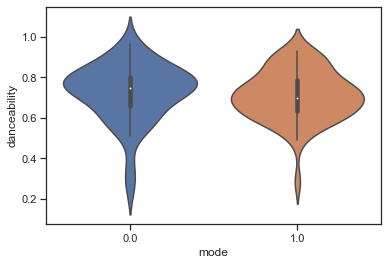

In [15]:
sns.violinplot(x=data["mode"], y=data["danceability"])

Предполагаемый общий размер трека. Размер (метр) - это условное обозначение, определяющее количество ударов в каждом такте (или такте).

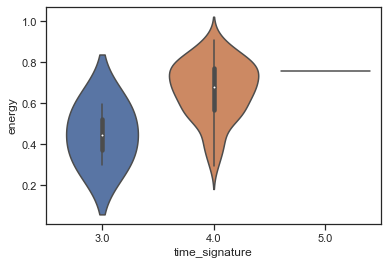

In [16]:
sns.violinplot(x=data["time_signature"], y=data["energy"])